In [5]:
from MatModels import *
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [6]:
def get_paracaidas(t,v,k,m,g):
  dvdt = g-(k/m)*v
  return dvdt


In [7]:
t=30
k=12.5
m=68
g=9.81
v=0
dt = 0.01
v, t = get_euler(0,t,v,get_paracaidas, dt , k, m, g)


In [8]:
v

array([ 0.0981    ,  0.19601967,  0.29375934, ..., 53.15178715,
       53.15218166, 53.15257544])

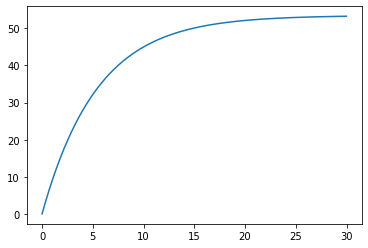

In [9]:
plt.plot(t, v)
plt.show()

In [10]:
def ecosistema(t, ci, a, b, c, d):
  dcdt = a * ci[0] - b * ci[0] * ci[1] # ci es un vector
  dzdt = -c * ci[1] + d * ci[0] * ci[1]
  return numpy.array([dcdt, dzdt])
  

In [11]:
ci = numpy.array([1.0,0.5]) # 100 y 50
Y, t = get_euler(0,20,ci, ecosistema, 0.01 ,1.2, 0.9, 1,1.1)
 

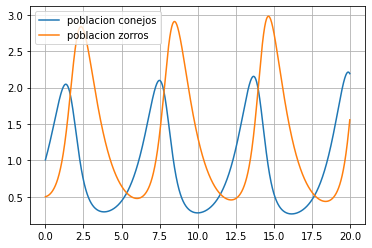

In [12]:
plt.plot(t,Y[:,0], label = "poblacion conejos")
plt.plot(t,Y[:,1], label = "poblacion zorros")
plt.legend()
plt.grid()

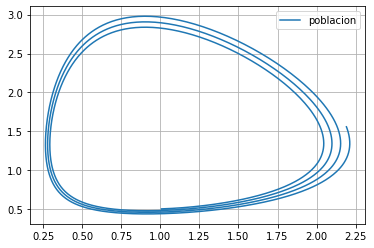

In [13]:
plt.plot(Y[:,0],Y[:,1], label = "poblacion")
plt.legend()
plt.grid()

In [ ]:
# modelo SIR
# N = S(t)+I(t)+R(t)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

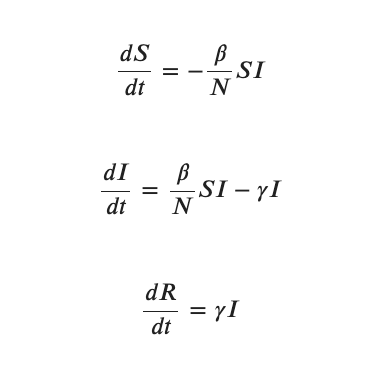

In [ ]:
# using scipy
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = numpy.linspace(0, 160, 160)

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T



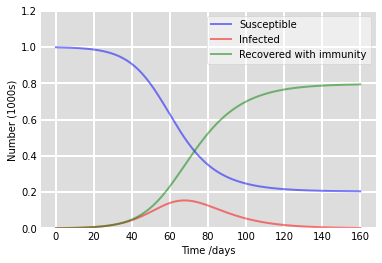

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()